## Loss Visualisation

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel("/home/jupyter/duplicates_detection/intl-duplicates/det_lat/test_folder/translation_training_logs_vf.xlsx")

In [28]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [29]:
df.head()

,loss,learning_rate,epoch,step,eval_loss,eval_rouge1,eval_rouge2,eval_rougeL,eval_bleu,eval_gen_len,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,8.2000,0.000994,0.08,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.5030,0.000987,0.16,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.2025,0.000980,0.24,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.9923,0.000974,0.31,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.8248,0.000967,0.39,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.columns

Index(['loss', 'learning_rate', 'epoch', 'step', 'eval_loss', 'eval_rouge1',
       'eval_rouge2', 'eval_rougeL', 'eval_bleu', 'eval_gen_len',
       'eval_runtime', 'eval_samples_per_second', 'eval_steps_per_second',
       'train_runtime', 'train_samples_per_second', 'train_steps_per_second',
       'total_flos', 'train_loss'],
      dtype='object')

In [31]:
df[df.eval_loss.notnull()]

,loss,learning_rate,epoch,step,eval_loss,eval_rouge1,eval_rouge2,eval_rougeL,eval_bleu,eval_gen_len,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
12,NaN,NaN,1.0,6375,6.261181,0.0000,0.0,0.0000,0.0328,128.0000,1545.9486,0.728,0.364,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,2.0,12750,5.940794,0.0000,0.0,0.0000,0.0731,128.0000,1547.8489,0.727,0.364,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,3.0,19125,5.690328,0.0000,0.0,0.0000,0.1004,128.0000,1498.1791,0.751,0.376,NaN,NaN,NaN,NaN,NaN
54,NaN,NaN,4.0,25500,5.538978,0.0000,0.0,0.0000,0.0979,128.0000,1520.8266,0.740,0.370,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,5.0,31875,5.450223,0.0000,0.0,0.0000,0.1393,128.0000,1560.7424,0.721,0.361,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,6.0,38250,5.363143,0.0000,0.0,0.0000,0.1272,128.0000,1562.6619,0.720,0.360,NaN,NaN,NaN,NaN,NaN
95,NaN,NaN,7.0,44625,5.343078,0.0002,0.0,0.0002,0.1470,128.0000,1562.9406,0.720,0.360,NaN,NaN,NaN,NaN,NaN
109,NaN,NaN,8.0,51000,5.352187,0.0013,0.0,0.0011,0.2176,128.0000,1536.7740,0.732,0.366,NaN,NaN,NaN,NaN,NaN
122,NaN,NaN,9.0,57375,5.406869,0.0004,0.0,0.0004,0.2177,127.9973,1522.7937,0.739,0.370,NaN,NaN,NaN,NaN,NaN
136,NaN,NaN,10.0,63750,5.505031,0.0023,0.0,0.0023,0.2291,128.0000,1531.5076,0.735,0.368,NaN,NaN,NaN,NaN,NaN


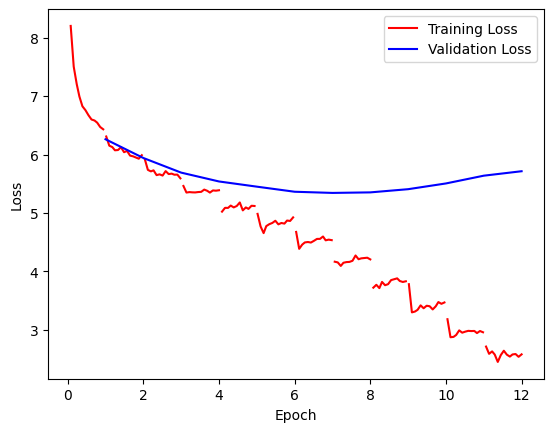

In [33]:
# Visualize loss history
plt.plot(df['epoch'], df['loss'], 'r-')
plt.plot(df[df.eval_loss.notnull()]['epoch'], df[df.eval_loss.notnull()]['eval_loss'], 'b-')
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

## Inference

In [7]:
from datapull import pull_data
from datasets import DatasetDict
task = "translation"

In [8]:
english_file_path = "./train.en"
hindi_file_path = "./train.hi"


In [9]:
dataset = pull_data(english_file_path, hindi_file_path,task)

## Train-Test-Valiation Split 
print("Train-Test-Valiation Split : ")
train_test_dataset = dataset.train_test_split(test_size=0.15)
test_valid = train_test_dataset['test'].train_test_split(test_size=0.5)
raw_datasets = DatasetDict({'train': train_test_dataset['train'],
                            'test': test_valid['test'],
                            'valid': test_valid['train']})


Loading English-Hindi Translation Data : 
Train-Test-Valiation Split : 


In [10]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 12750
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 1125
    })
    valid: Dataset({
        features: ['translation'],
        num_rows: 1125
    })
})

In [11]:
input_text_list = [list(hi.values())[0] for hi in  raw_datasets['valid']['translation']][:10]
gt_list = [list(hi.values())[1] for hi in  raw_datasets['valid']['translation']][:10]

In [12]:
input_text_list[2]

'We expect this number to rise further.\n'

In [13]:
len(input_text_list)

10

In [14]:
from transformers import AutoModelForSeq2SeqLM
from transformers import Seq2SeqTrainingArguments, DataCollatorForSeq2Seq, AutoTokenizer
model_path = "/home/jupyter/duplicates_detection/intl-duplicates/det_lat/test_folder/en-hi-translation-finetuned-14apr/checkpoint-76500"

# Load the model checkpoint
model = AutoModelForSeq2SeqLM.from_pretrained(model_path)

# Define the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)



In [15]:
# Tokenize the input text
input_tokens = tokenizer.batch_encode_plus(input_text_list, max_length=512, truncation=True, return_tensors="pt",padding=True)


In [16]:
tokenizer.decode(input_tokens['input_ids'][1])

'The police have arrested both the accused and they were presented before Court.</s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>'

In [17]:
from transformers import AutoModelForSeq2SeqLM
from transformers import Seq2SeqTrainingArguments, DataCollatorForSeq2Seq, AutoTokenizer

def evaluate_model(model_path, input_text,ground_truth,task):
    print(f"{task.upper() } Evaluation : ")
    
    # Load the model checkpoint
    model = AutoModelForSeq2SeqLM.from_pretrained(model_path)

    # Define the tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_path)

    # Tokenize the input text
    input_tokens = tokenizer.batch_encode_plus(input_text, max_length=512, truncation=True, return_tensors="pt",padding=True)

    # Perform inference
    outputs = model.generate(input_ids=input_tokens["input_ids"], attention_mask=input_tokens["attention_mask"],max_length= 128,early_stopping = True)

    # Decode the generated output tokens
    output_text = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    
    pred_list = []
    for inp,out,gt in zip(input_text,output_text,ground_truth) :
        print('*'*100)
        print()
        print(f"{task.upper() } Model input : {inp} ")
        print(f"{task.upper() } Model output : {out} ")
        print(f"Ground Truth : {gt} ")
        print()
        print('*'*100)
        pred_list.append(out)
        
    return pred_list

In [18]:
generated_text = evaluate_model(model_path,input_text_list,gt_list,task)



TRANSLATION Evaluation : 


/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


****************************************************************************************************

TRANSLATION Model input : With a very high number of COVID patients recovering every day, Indias steady trend of posting high level of daily recoveries continues.89,154 recoveries have been registered in the last 24 hours in the country
 
TRANSLATION Model output : इस साल जून में कोरोना वायरस के अनुसार, देश में अब तक 7 से अधिक लोग ठीक हुए हैं, जबकि चीन के एक नए मरीज हैं, जो भारत में अब तक कुल कोरोना से ठीक हो चुके हैं। इसके साथ ही देश में अब तक कुल 29 लोगों की मौत हो गई है। वहीं भारतीय दंड संहिता,118,51,51,118,51,51,118,51,51,118,51,51,118,51,114 लाख से अब तक देश में अब तक देश में अब तक देश 
Ground Truth : हर दिन ठीक होने वाले कोविड रोगियों की अधिक संख्या के साथ ही भारत में रोजाना अधिक संख्या में लगातार रिकवरी  भी जारी है
 

****************************************************************************************************
**************************************************************

## Evaluation Metrics

In [19]:
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.bleu_score import SmoothingFunction
from nltk.translate import bleu_score
import nltk
from rouge import Rouge
from pycocoevalcap.cider.cider import Cider
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
def calculate_bleu_scores(actual, generated):
    smoothie = SmoothingFunction().method4
    actual_tokenized = [nltk.word_tokenize(group) for group in actual]
    generated_tokenized = [nltk.word_tokenize(gen) for gen in generated]
    
    score = corpus_bleu(actual_tokenized, generated_tokenized, smoothing_function=smoothie)
    return score

def calculate_rouge_scores(actual, generated):
    rouge = Rouge()
    scores = rouge.get_scores(generated, actual)
    return scores

def calculate_cider_scores(actual, generated):
    act_dict = {idx: [line] for idx, line in enumerate(actual)}
    gen_dict = {idx: [line] for idx, line in enumerate(generated)}
    cider = Cider()
    (score, scores) = cider.compute_score(act_dict, gen_dict)
    return score

In [22]:
calculate_bleu_scores(gt_list, generated_text)

0.0006194463600572004

In [23]:
calculate_rouge_scores(gt_list, generated_text)

[{'rouge-1': {'r': 0.38095238095238093,
   'p': 0.18604651162790697,
   'f': 0.24999999559082037},
  'rouge-2': {'r': 0.09090909090909091,
   'p': 0.037037037037037035,
   'f': 0.05263157483379533},
  'rouge-l': {'r': 0.23809523809523808,
   'p': 0.11627906976744186,
   'f': 0.15624999559082045}},
 {'rouge-1': {'r': 0.3333333333333333,
   'p': 0.3333333333333333,
   'f': 0.3333333283333334},
  'rouge-2': {'r': 0.058823529411764705, 'p': 0.05, 'f': 0.05405404908692522},
  'rouge-l': {'r': 0.2777777777777778,
   'p': 0.2777777777777778,
   'f': 0.2777777727777779}},
 {'rouge-1': {'r': 0.18181818181818182,
   'p': 0.07692307692307693,
   'f': 0.10810810392987599},
  'rouge-2': {'r': 0.1, 'p': 0.025, 'f': 0.03999999680000026},
  'rouge-l': {'r': 0.18181818181818182,
   'p': 0.07692307692307693,
   'f': 0.10810810392987599}},
 {'rouge-1': {'r': 0.375, 'p': 0.13636363636363635, 'f': 0.19999999608888894},
  'rouge-2': {'r': 0.14285714285714285,
   'p': 0.03333333333333333,
   'f': 0.054054050

In [24]:
calculate_cider_scores(gt_list, generated_text)

2.819146274310125e-13